In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df
from JJ_data_processing import xy_by_id,extract_Isw_R0_by_id

from JJformulas import *
from meas_util import *
from JJcalc import JJpar

from JJmeasurement import *

C:\ProgramData\Anaconda3\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
C:\ProgramData\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
def loadDB2Bscan(SAMPLE = 'D070B1N5v1', run=1507, 
                 folder = r'../_expdata/Experiments_{}.db'):
    qc.config["core"]["db_location"] = folder.format(SAMPLE)
    [[B, runid]] = get_data_by_id(run)
    Blst, rlst = B['data'], runid['data']
    Isws = [extract_Isw_R0_by_id(rid, dy = 120e-6)[0] for rid in rlst]
    return (Isws, Blst, rlst)

In [4]:
jj = JJmeas(sample = 'D070B1N5v1')
jj.ZF = -10e-6
jj.FF = 210e-6
jj70N5 = {'Isw': [], 'B': [], 'cos': []}
jj70N5['Isw'], jj70N5['B'], _ = loadDB2Bscan(SAMPLE = 'D070B1N5v1', run=1507)
jj70N5['cos'] = jj.B_to_cos(jj70N5['B'])
jj70N5 = pd.DataFrame(jj70N5)

qc.config["core"]["db_location"] = r'../_expdata/Experiments_{}.db'.format('D079N5')
jj.cos_to_B( np.linspace(1, 0, 51 ))
Blst, rlst = jj.cos_to_B(np.linspace(1, 0, 51 )), range(72,122+1)
Isws = [extract_Isw_R0_by_id(rid, dy = 20e-6)[0] for rid in rlst]
jj79N5 = {'Isw': [], 'B': [], 'cos': []}
jj79N5['Isw'], jj79N5['B'], _ = Isws, Blst, rlst
jj79N5['cos'] = jj.B_to_cos(jj79N5['B'])
jj79N5 = pd.DataFrame(jj79N5)

jj = JJmeas(sample = 'D078N5')
jj.db_connect()
jj.ZF = 0
jj.FF = 210e-6
jj78N5 = {'Isw': [], 'B': [], 'cos': []}
jj78N5['Isw'], jj78N5['B'], _ = loadDB2Bscan(SAMPLE = 'D078N5', run=382)
jj78N5['cos'] = jj.B_to_cos(jj78N5['B'])
jj78N5 = pd.DataFrame(jj78N5)

jj70N7 = JJmeas(sample = 'D070B1N7')
jj70N7.db_connect()

jj79N6 = JJmeas(sample = 'D079N6')
jj79N6.db_connect()

jj85N5 = JJmeas(sample = 'D085N5')
jj85N5.db_connect()


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


no points in cut range
no points in cut range


<IPython.core.display.Javascript object>


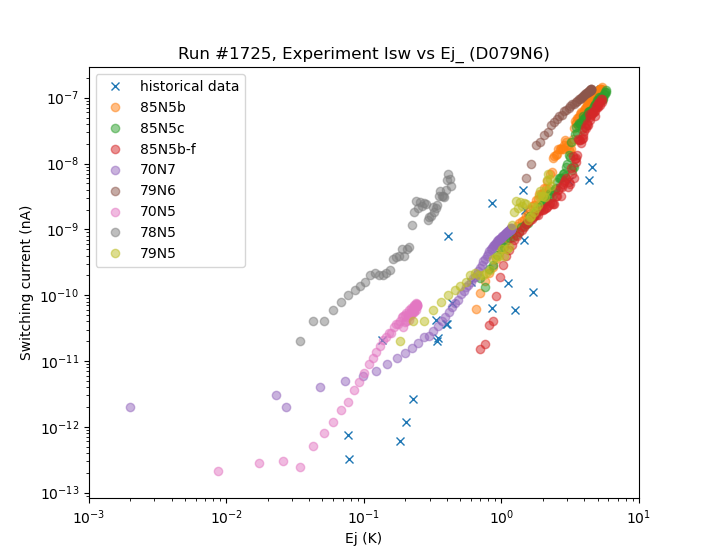

(0.001, 10)

In [9]:
df = pd.read_csv('../chain table.csv')

fig,ax = plt.subplots()
ax.plot(df.Ej, df.Isw, ls='none',marker = 'x', label = 'historical data')

jj85N5.pbi(739, axes = ax, label = '85N5b', alpha = 0.5)
jj85N5.pbi(1217, axes = ax, label = '85N5c', alpha = 0.5)
jj85N5.pbi(933, axes = ax, label = '85N5b-f', alpha = 0.5)
jj70N7.pbi(1097, axes = ax, label = '70N7', alpha = 0.5)
jj79N6.pbi(1725, axes = ax, label = '79N6', alpha = 0.5)
ax.plot(0.242*jj70N5[jj70N5.cos>0].cos,jj70N5[jj70N5.cos>0].Isw, 
        label = '70N5', marker = 'o', ls = 'none', alpha = 0.5)
ax.plot(0.428*jj79N5[jj79N5.cos>0].cos,jj79N5[jj79N5.cos>0].Isw, 
        label = '78N5', marker = 'o', ls = 'none', alpha = 0.5)
ax.plot(2.288*jj79N5[jj79N5.cos>0].cos,jj79N5[jj79N5.cos>0].Isw, 
        label = '79N5', marker = 'o', ls = 'none', alpha = 0.5)

# ax.plot(np.asarray([10,0.1]),np.asarray([100e-9,0.01e-9])*6.4)
# ax.plot(np.asarray([10,0.1]),np.asarray([100e-9,0.01e-9])*0.64)
# ax.plot(np.asarray([4,0.4]),np.asarray([100e-9,0.01e-9]))

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.001 ,10)
# ax.set_ylim(1e-15 ,1e-6)

In [6]:
# jj = JJmeas(sample = 'D070B1N5v1')
# jj.db_connect()

# runid_P = Parameter(name = 'runid_P', label = 'run id', unit = ' ') 
# Bfield_tool = Parameter(name = 'Bfield', label = 'B field', unit = 'A') 
# ids = range(1264, 1384+1)
# B_list = np.linspace(-.10e-3, .5e-3, 121)

# #          [range(237, 262+1),  32e-3,  cos_to_B(np.linspace(1,0,26)),       'fast 6, I_div'],
# #          [range(263, 288+1),  32e-3,  cos_to_B(np.linspace(1,0,26)),       'AWG att 1'],
# #          [range(289, 314+1),  32e-3,  cos_to_B(np.linspace(1,0,26)),       'AWG att 10'],